In [114]:
%matplotlib inline

import os
import yaml
import numpy as np
import sys
import cv2 
from matplotlib import pyplot as plt

# add spartan to PYTHONPATH
def addSpartanToPythonPath():
    sys.path.append("/home/manuelli/spartan/modules")
    
addSpartanToPythonPath()
import spartan.utils.utils as spartanUtils
import spartan.utils

# how to install opencv https://pypi.python.org/pypi/opencv-python
# and extra packages https://pypi.python.org/pypi/opencv-contrib-python

In [115]:
data_folder = "20171207-014510"
cwd = os.getcwd()
data_folder_fullpath = os.path.join(cwd, data_folder)

def getFullFilename(partialFilename):
    return os.path.join(data_folder_fullpath, partialFilename)
    
data_file = getFullFilename("data.yaml")

data = spartanUtils.getDictFromYamlFilename(data_file)

"""
Converts depth image from uint16 to floats
"""
def convertDepthImage(img):
    return (1.0/10**4)*img


In [116]:
# load images
imageDict = dict()
pose_name = 'scan_left'
backgroundImgFilename = getFullFilename(data['images'][pose_name]['background']['rgb']['filename'])
foregroundImgFilename = getFullFilename(data['images'][pose_name]['foreground']['rgb']['filename'])

f_depth_filename = getFullFilename(data['images'][pose_name]['foreground']['depth']['filename'])
b_depth_filename = getFullFilename(data['images'][pose_name]['background']['depth']['filename'])

f_depth_raw = cv2.imread(f_depth_filename, cv2.IMREAD_UNCHANGED)
b_depth_raw = cv2.imread(b_depth_filename, cv2.IMREAD_UNCHANGED)

f_depth = convertDepthImage(f_depth_raw)
b_depth = convertDepthImage(b_depth_raw)

# opencv is in BGR format
background_img = cv2.imread(backgroundImgFilename, cv2.IMREAD_COLOR)
foreground_img = cv2.imread(foregroundImgFilename, cv2.IMREAD_COLOR)
# cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print type(img)
# print type(cv_rgb)
# print np.shape(cv_rgb)
print background_img.dtype
print f_depth.dtype

uint8
float64


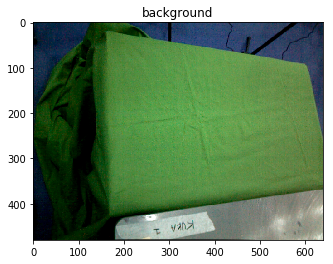

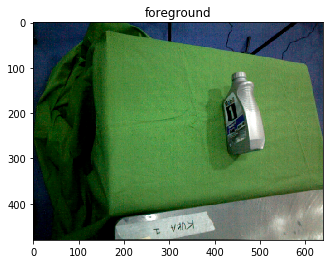

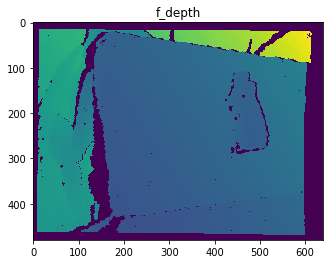

[[ 0.621  0.622  0.623  0.623  0.625  0.625  0.625  0.626  0.626  0.626]
 [ 0.621  0.621  0.622  0.623  0.623  0.623  0.625  0.626  0.626  0.626]
 [ 0.621  0.621  0.622  0.623  0.623  0.623  0.625  0.626  0.626  0.626]
 [ 0.62   0.62   0.622  0.622  0.623  0.623  0.623  0.625  0.625  0.625]
 [ 0.62   0.62   0.621  0.622  0.622  0.622  0.623  0.623  0.625  0.625]
 [ 0.62   0.62   0.621  0.622  0.622  0.622  0.623  0.623  0.625  0.625]
 [ 0.619  0.62   0.621  0.621  0.621  0.622  0.622  0.622  0.623  0.623]
 [ 0.619  0.62   0.621  0.621  0.621  0.621  0.622  0.622  0.623  0.623]
 [ 0.619  0.62   0.621  0.621  0.621  0.621  0.621  0.622  0.623  0.623]
 [ 0.619  0.62   0.621  0.62   0.62   0.621  0.621  0.621  0.622  0.623]]


In [117]:
plt.imshow(background_img)
plt.title("background")
plt.show()

plt.imshow(foreground_img)
plt.title("foreground")
plt.show()

plt.imshow(f_depth)
plt.title('f_depth')
plt.show()

print f_depth[200:210,200:210]

False


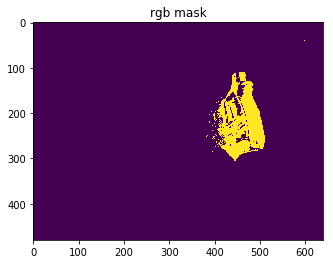

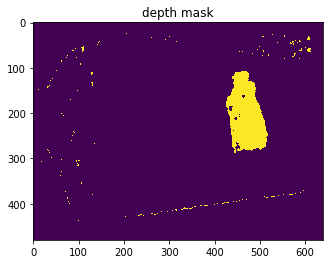

In [120]:
"""
Computes the foreground mask from the RGB image
"""
def computeRGBMask(foreground_img, background_img, rgb_threshold=0.25):
    scaleFactor = 255.0
    f_img = foreground_img/scaleFactor
    b_img = background_img/scaleFactor
    mask = np.abs(f_img - b_img) < rgb_threshold
    mask = np.sum(mask, 2)
    mask = (mask == 3)
    foregroundMask = ~mask
    return foregroundMask


def computeDepthMask(foreground_depth, background_depth, threshold=0.02):
    diff_mask = np.abs(foreground_depth - background_depth) > threshold
    not_missing = np.logical_and(background_depth > 0, foreground_depth > 0)
    
    foregroundMask = np.logical_and(diff_mask, not_missing)
    return foregroundMask

rgbMask = computeRGBMask(foreground_img, background_img)
print mask[0,0]

depthMask = computeDepthMask(f_depth, b_depth)

plt.imshow(rgbMask)
plt.title('rgb mask')
plt.show()

plt.imshow(depthMask)
plt.title('depth mask')
plt.show()

combinedMask = np.logical_or(rgbMask, depthMask)

# do euclidean clustering . . . on the 
